The probability of scoring exactly 20 points is

$$0.02 = \sum_{I\subset[50],|I|=20}\left(\prod_{x\in I}\left(1-\frac{x}{q}\right)\cdot \prod_{x\not \in I}\frac{x}{q}\right)$$
$$0.02 = q^{-50}\sum_{I\subset[50],|I|=20}\left(\prod_{x\in I}\left(q-x\right)\cdot \prod_{x\not \in I}x\right)$$

This is very difficult to work with. Probably use dp?

In [2]:
def calc_prob(q: float, shot_count: int, target: int) -> float:
    prob = [[0.] * (shot_count + 1) for _ in range(shot_count + 1)]

    prob[0][0] = 1

    for x in range(shot_count):
        for k in range(shot_count):
            prob[x + 1][k] += prob[x][k] * ((x + 1) / q)
            prob[x + 1][k + 1] += prob[x][k] * (1 - (x + 1) / q)

    return prob[shot_count][target]

In [3]:
calc_prob(80, 50, 20)

5.272535477591907e-06

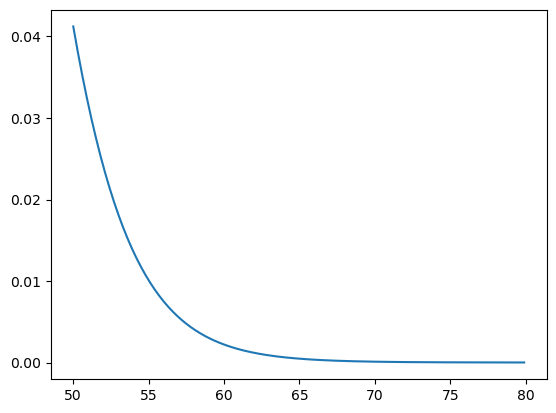

In [4]:
import matplotlib.pyplot as plt
import numpy as np

SHOTS = 50
TARGET = 20

x_axis = np.arange(50, 80, 0.1)
plt.plot(x_axis, [calc_prob(x, SHOTS, TARGET) for x in x_axis])
plt.show()

In [5]:
l = 50.
r = 60.

ACCURACY = 10 ** (-12)
TARGET_PROB = 0.02

while r - l >= ACCURACY:
    m = (l + r) / 2

    if calc_prob(m, SHOTS, TARGET) < TARGET_PROB:
        r = m
    else:
        l = m

In [6]:
l, r

(52.649457195308855, 52.649457195309424)

In [7]:
round(l, 10)

52.6494571953